# EJERCICIOS

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, BatchNormalization,Normalization,Dropout
from keras.initializers import HeNormal,lecun_normal
from keras.activations import swish, selu

2025-01-22 01:01:39.619228: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-22 01:01:39.626836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-22 01:01:39.635845: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-22 01:01:39.638734: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-22 01:01:39.645953: I tensorflow/core/platform/cpu_feature_guar

In [3]:
# Verifica si TensorFlow detecta la GPU
if tf.config.list_physical_devices('GPU'):
    print("¡GPU encontrada!")
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
else:
    print("¡GPU no encontrada!")

¡GPU encontrada!
Num GPUs Available:  1


I0000 00:00:1737504102.652807  100523 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737504102.681760  100523 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737504102.681963  100523 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [5]:
# Fusionar todos los datos para dividir posteriormente
x_total = np.concatenate((x_train, x_test))
y_total = np.concatenate((y_train, y_test))

# Dividir el conjunto completo en 50,000 para entrenamiento y 10,000 para validación + test
x_train, x_temp, y_train, y_temp = train_test_split(x_total, y_total, test_size=10000, random_state=42)

# Dividir los 10,000 restantes en 5,000 para validación y 5,000 para test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=5000, random_state=42)

# Imprimir las formas resultantes
print("Forma de x_train:", x_train.shape)
print("Forma de x_val:", x_val.shape)
print("Forma de x_test:", x_test.shape)

Forma de x_train: (50000, 32, 32, 3)
Forma de x_val: (5000, 32, 32, 3)
Forma de x_test: (5000, 32, 32, 3)


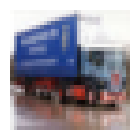

In [8]:
plt.figure(figsize=(1.5, 1.5))
plt.imshow(x_train[0])
plt.axis('off')
plt.tight_layout()
plt.show()

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [28]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


model = Sequential()
model.add(Input(shape=(32, 32,3)))
model.add(Flatten())
for _ in range(20):
    model.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model.add(Dense(10, activation="softmax"))
    




### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [42]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
entries=[]
histories=[]
models=[]
dicc=[]
    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    i+=1
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=model.fit(x_train, y_train, epochs=45, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time

    entries.append({'ID':idx,
                 'LR':lr,
                 'sparse categorical accuracy training':history.history['sparse_categorical_accuracy'][-1],
                 'sparse categorical accuracy validation':history.history['val_sparse_categorical_accuracy'][-1],
                 'Tiempo Total(s)':training_time
                   })
    models.append(model)

Epoch 1/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 2.3035 - sparse_categorical_accuracy: 0.0984 - val_loss: 2.3037 - val_sparse_categorical_accuracy: 0.0964
Epoch 2/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3032 - sparse_categorical_accuracy: 0.0984 - val_loss: 2.3034 - val_sparse_categorical_accuracy: 0.0964
Epoch 3/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3030 - sparse_categorical_accuracy: 0.0984 - val_loss: 2.3032 - val_sparse_categorical_accuracy: 0.0964
Epoch 4/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0984 - val_loss: 2.3030 - val_sparse_categorical_accuracy: 0.0964
Epoch 5/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0984 - val_loss: 2.3029 - val_sparse_categorical_accuracy: 0.0964
Epoch 6/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0984 - val_loss: 2.3029 - val_sparse_categorical_accuracy:

In [43]:
best_model = max(entries, key=lambda x: x['sparse categorical accuracy validation'])
print(best_model)


{'ID': 0, 'LR': 0.0001, 'sparse categorical accuracy training': 0.10100000351667404, 'sparse categorical accuracy validation': 0.09780000150203705, 'Tiempo Total(s)': 119.5661678314209}


In [44]:
dicc.append({
    'Red neuronal normal': {

        'Tasa de aprendizaje': best_model['LR'],

        'Entrenamiento sparse categorical accuracy': best_model['sparse categorical accuracy training'],

        'Validación sparse categorical accuracy': best_model['sparse categorical accuracy validation'],

        'Tiempo total (s)': best_model['Tiempo Total(s)']

    }
})
for entrada in dicc:
    print(entrada)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.10100000351667404, 'Validación sparse categorical accuracy': 0.09780000150203705, 'Tiempo total (s)': 119.5661678314209}}


### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [45]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=best_model['LR'])
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

tf.keras.backend.clear_session()
tf.random.set_seed(17)

model_opti = Sequential()
model_opti.add(Input(shape=(32, 32,3)))
model_opti.add(Flatten())
for _ in range(20):
    model_opti.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model_opti.add(Dense(10, activation="softmax"))



model_opti.compile(loss="sparse_categorical_crossentropy",
            optimizer=optimizer,
            metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history=model_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 8.4287 - sparse_categorical_accuracy: 0.1569 - val_loss: 2.1151 - val_sparse_categorical_accuracy: 0.2276
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0140 - sparse_categorical_accuracy: 0.2619 - val_loss: 1.9041 - val_sparse_categorical_accuracy: 0.3000
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8994 - sparse_categorical_accuracy: 0.3101 - val_loss: 1.8311 - val_sparse_categorical_accuracy: 0.3376
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8235 - sparse_categorical_accuracy: 0.3353 - val_loss: 1.7732 - val_sparse_categorical_accuracy: 0.3636
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7706 - sparse_categorical_accuracy: 0.3594 - val_loss: 1.7765 - val_sparse_categorical_accuracy: 0.3576
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7192 - sparse_categorical_accuracy: 0.3768 - val_loss: 1.6960 - val_sparse_categorical_acc

In [46]:
best_epoch_acc= max(history.history['sparse_categorical_accuracy'])
best_epoch_index = history.history['sparse_categorical_accuracy'].index(best_epoch_acc)


dicc.append({
    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': best_model['LR'],

        'Entrenamiento sparse categorical accuracy': history.history['sparse_categorical_accuracy'][-1],

        'Validación sparse categorical accuracy': history.history['val_sparse_categorical_accuracy'][-1],

        'Tiempo total (s)': training_time,

        'Mejor época': best_epoch_index

    }
})



In [47]:
for entrada in dicc:
    print(entrada)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.10100000351667404, 'Validación sparse categorical accuracy': 0.09780000150203705, 'Tiempo total (s)': 119.5661678314209}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.5475999712944031, 'Validación sparse categorical accuracy': 0.4564000070095062, 'Tiempo total (s)': 91.28289580345154, 'Mejor época': 32}}


### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [48]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


modelo_lotes = Sequential()
modelo_lotes.add(Input(shape=(32, 32,3)))
modelo_lotes.add(Flatten())

for _ in range(20):
    modelo_lotes.add(BatchNormalization())
    modelo_lotes.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
modelo_lotes.add(Dense(10, activation="softmax"))

In [49]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
entries=[]
histories=[]
models_lotes=[]

    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    i+=1
    modelo_lotes.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=modelo_lotes.fit(x_train, y_train, epochs=45, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time

    entries.append({'ID':idx,
                 'LR':lr,
                 'sparse categorical accuracy training':history.history['sparse_categorical_accuracy'][-1],
                 'sparse categorical accuracy validation':history.history['val_sparse_categorical_accuracy'][-1],
                 'Tiempo Total(s)':training_time
                   })
    models_lotes.append(model)

Epoch 1/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 2.6026 - sparse_categorical_accuracy: 0.1066 - val_loss: 2.6582 - val_sparse_categorical_accuracy: 0.1236
Epoch 2/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.3481 - sparse_categorical_accuracy: 0.1278 - val_loss: 2.3318 - val_sparse_categorical_accuracy: 0.1654
Epoch 3/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.1833 - sparse_categorical_accuracy: 0.1787 - val_loss: 2.1259 - val_sparse_categorical_accuracy: 0.2242
Epoch 4/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.0550 - sparse_categorical_accuracy: 0.2313 - val_loss: 1.9538 - val_sparse_categorical_accuracy: 0.2846
Epoch 5/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.9436 - sparse_categorical_accuracy: 0.2839 - val_loss: 1.8620 - val_sparse_categorical_accuracy: 0.3180
Epoch 6/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8538 - sparse_categorical_accuracy: 0.3304 - val_loss: 1.7618 - val_sparse_categorical_accuracy

In [54]:
best_model_lotes = max(entries, key=lambda x: x['sparse categorical accuracy validation'])
print(best_model_lotes)

{'ID': 4, 'LR': 0.003, 'sparse categorical accuracy training': 0.7771999835968018, 'sparse categorical accuracy validation': 0.4691999852657318, 'Tiempo Total(s)': 228.00240325927734}


In [55]:
dicc.append({
    'Red neuronal por lotes': {

        'Tasa de aprendizaje': best_model_lotes['LR'],

        'Entrenamiento sparse categorical accuracy': best_model_lotes['sparse categorical accuracy training'],

        'Validación sparse categorical accuracy': best_model_lotes['sparse categorical accuracy validation'],

        'Tiempo total (s)': best_model_lotes['Tiempo Total(s)']

    }
})

In [56]:
for entrada in dicc:
    print(entrada)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.10100000351667404, 'Validación sparse categorical accuracy': 0.09780000150203705, 'Tiempo total (s)': 119.5661678314209}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.5475999712944031, 'Validación sparse categorical accuracy': 0.4564000070095062, 'Tiempo total (s)': 91.28289580345154, 'Mejor época': 32}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.003, 'Entrenamiento sparse categorical accuracy': 0.7771999835968018, 'Validación sparse categorical accuracy': 0.4691999852657318, 'Tiempo total (s)': 228.00240325927734}}


In [57]:
optimizer_lotes = tf.keras.optimizers.Nadam(learning_rate=best_model_lotes['LR'])
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

tf.keras.backend.clear_session()
tf.random.set_seed(17)

model_lotes_opti = Sequential()
model_lotes_opti.add(Input(shape=(32, 32,3)))
model_lotes_opti.add(Flatten())
for _ in range(20):
    model_lotes_opti.add(BatchNormalization())
    model_lotes_opti.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model_lotes_opti.add(Dense(10, activation="softmax"))



model_lotes_opti.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_lotes,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_lotes=model_lotes_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_lotes = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 2.1531 - sparse_categorical_accuracy: 0.2221 - val_loss: 1.8049 - val_sparse_categorical_accuracy: 0.3422
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.8473 - sparse_categorical_accuracy: 0.3395 - val_loss: 1.7506 - val_sparse_categorical_accuracy: 0.3784
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.7741 - sparse_categorical_accuracy: 0.3718 - val_loss: 1.7214 - val_sparse_categorical_accuracy: 0.3874
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.7326 - sparse_categorical_accuracy: 0.3870 - val_loss: 1.6758 - val_sparse_categorical_accuracy: 0.4132
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6839 - sparse_categorical_accuracy: 0.4090 - val_loss: 1.6951 - val_sparse_categorical_accuracy: 0.4104
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6352 - sparse_categorical_accuracy: 0.4247 - val_loss: 1.6686 - val_sparse_categorical_ac

In [58]:
best_epoch_acc= max(history_lotes.history['sparse_categorical_accuracy'])
best_epoch_index = history_lotes.history['sparse_categorical_accuracy'].index(best_epoch_acc)


dicc.append({
    'Red neuronal por lotes con detención temprana': {

        'Tasa de aprendizaje': best_model_lotes['LR'],

        'Entrenamiento sparse categorical accuracy': history_lotes.history['sparse_categorical_accuracy'][-1],

        'Validación sparse categorical accuracy': history_lotes.history['val_sparse_categorical_accuracy'][-1],

        'Tiempo total (s)': training_time_lotes,

        'Mejor época': best_epoch_index

    }
})

In [59]:
for entrada in dicc:
    print(entrada)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.10100000351667404, 'Validación sparse categorical accuracy': 0.09780000150203705, 'Tiempo total (s)': 119.5661678314209}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.5475999712944031, 'Validación sparse categorical accuracy': 0.4564000070095062, 'Tiempo total (s)': 91.28289580345154, 'Mejor época': 32}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.003, 'Entrenamiento sparse categorical accuracy': 0.7771999835968018, 'Validación sparse categorical accuracy': 0.4691999852657318, 'Tiempo total (s)': 228.00240325927734}}
{'Red neuronal por lotes con detención temprana': {'Tasa de aprendizaje': 0.003, 'Entrenamiento sparse categorical accuracy': 0.6240599751472473, 'Validación sparse categorical accuracy': 0.48660001158714294, 'Tiempo total (s)': 119.22793698310852, 'Mejor época': 20}}


### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

In [60]:
x_train_norm = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
x_val_norm = (x_val - np.min(x_val)) / (np.max(x_val) - np.min(x_val))
x_test_norm = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))

y_train_norm = (y_train - np.min(y_train)) / (np.max(y_train) - np.min(y_train))
y_val_norm = (y_val - np.min(y_val)) / (np.max(y_val) - np.min(y_val))
y_test_norm = (y_test - np.min(y_test)) / (np.max(y_test) - np.min(y_test))

In [61]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


model_selu = Sequential()
model_selu.add(Input(shape=(32, 32,3)))
model_selu.add(Flatten())
for _ in range(20):
    model_selu.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_selu.add(Dense(10, activation="softmax"))
    

In [62]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
entries=[]
histories_selu=[]
models_selu=[]

    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    i+=1
    model_selu.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=model_selu.fit(x_train, y_train, epochs=45, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time

    entries.append({'ID':idx,
                 'LR':lr,
                 'sparse categorical accuracy training':history.history['sparse_categorical_accuracy'][-1],
                 'sparse categorical accuracy validation':history.history['val_sparse_categorical_accuracy'][-1],
                 'Tiempo Total(s)':training_time
                   })
    models_selu.append(model)

Epoch 1/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 2.0415 - sparse_categorical_accuracy: 0.2474 - val_loss: 1.7712 - val_sparse_categorical_accuracy: 0.3626
Epoch 2/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7609 - sparse_categorical_accuracy: 0.3594 - val_loss: 1.6751 - val_sparse_categorical_accuracy: 0.3882
Epoch 3/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6804 - sparse_categorical_accuracy: 0.3894 - val_loss: 1.6299 - val_sparse_categorical_accuracy: 0.4056
Epoch 4/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6275 - sparse_categorical_accuracy: 0.4091 - val_loss: 1.5976 - val_sparse_categorical_accuracy: 0.4254
Epoch 5/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5835 - sparse_categorical_accuracy: 0.4257 - val_loss: 1.6140 - val_sparse_categorical_accuracy: 0.4228
Epoch 6/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5516 - sparse_categorical_accuracy: 0.4379 - val_loss: 1.5949 - val_sparse_categorical_accuracy:

In [64]:
best_model_selu = max(entries, key=lambda x: x['sparse categorical accuracy validation'])
print(best_model_selu)

{'ID': 2, 'LR': 0.0007, 'sparse categorical accuracy training': 0.4945000112056732, 'sparse categorical accuracy validation': 0.4729999899864197, 'Tiempo Total(s)': 119.59696960449219}


In [65]:
dicc.append({
    'Red neuronal selu': {

        'Tasa de aprendizaje': best_model_selu['LR'],

        'Entrenamiento sparse categorical accuracy': best_model_selu['sparse categorical accuracy training'],

        'Validación sparse categorical accuracy': best_model_selu['sparse categorical accuracy validation'],

        'Tiempo total (s)': best_model_selu['Tiempo Total(s)']

    }
})

In [66]:
for entry in dicc:
    print(entry)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.10100000351667404, 'Validación sparse categorical accuracy': 0.09780000150203705, 'Tiempo total (s)': 119.5661678314209}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.5475999712944031, 'Validación sparse categorical accuracy': 0.4564000070095062, 'Tiempo total (s)': 91.28289580345154, 'Mejor época': 32}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.003, 'Entrenamiento sparse categorical accuracy': 0.7771999835968018, 'Validación sparse categorical accuracy': 0.4691999852657318, 'Tiempo total (s)': 228.00240325927734}}
{'Red neuronal por lotes con detención temprana': {'Tasa de aprendizaje': 0.003, 'Entrenamiento sparse categorical accuracy': 0.6240599751472473, 'Validación sparse categorical accuracy': 0.48660001158714294, 'Tiempo total (s)': 119.22793698310852, 'Mejor época': 20}}
{'Red neuronal 

In [67]:
optimizer_selu = tf.keras.optimizers.Nadam(learning_rate=best_model_selu['LR'])
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

model_selu_opti = Sequential()
model_selu_opti.add(Input(shape=(32, 32,3)))
model_selu_opti.add(Flatten())
for _ in range(20):
    model_selu_opti.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_selu_opti.add(Dense(10, activation="softmax"))

model_selu_opti.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_selu,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_selu=model_selu_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_selu = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.1921 - sparse_categorical_accuracy: 0.2105 - val_loss: 1.9144 - val_sparse_categorical_accuracy: 0.2978
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8861 - sparse_categorical_accuracy: 0.3053 - val_loss: 1.8521 - val_sparse_categorical_accuracy: 0.3328
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8189 - sparse_categorical_accuracy: 0.3328 - val_loss: 1.7680 - val_sparse_categorical_accuracy: 0.3624
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7730 - sparse_categorical_accuracy: 0.3545 - val_loss: 1.7400 - val_sparse_categorical_accuracy: 0.3728
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7362 - sparse_categorical_accuracy: 0.3680 - val_loss: 1.7328 - val_sparse_categorical_accuracy: 0.3732
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7093 - sparse_categorical_accuracy: 0.3824 - val_loss: 1.7209 - val_sparse_categorical_acc

In [68]:
best_epoch_acc= max(history_selu.history['sparse_categorical_accuracy'])
best_epoch_index = history_selu.history['sparse_categorical_accuracy'].index(best_epoch_acc)


dicc.append({
    'Red neuronal selu con detención temprana': {

        'Tasa de aprendizaje': best_model_selu['LR'],

        'Entrenamiento sparse categorical accuracy': history_selu.history['sparse_categorical_accuracy'][-1],

        'Validación sparse categorical accuracy': history_selu.history['val_sparse_categorical_accuracy'][-1],

        'Tiempo total (s)': training_time_selu,

        'Mejor época': best_epoch_index

    }
})

In [69]:
for entry in dicc:
    print(entry)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.10100000351667404, 'Validación sparse categorical accuracy': 0.09780000150203705, 'Tiempo total (s)': 119.5661678314209}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.5475999712944031, 'Validación sparse categorical accuracy': 0.4564000070095062, 'Tiempo total (s)': 91.28289580345154, 'Mejor época': 32}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.003, 'Entrenamiento sparse categorical accuracy': 0.7771999835968018, 'Validación sparse categorical accuracy': 0.4691999852657318, 'Tiempo total (s)': 228.00240325927734}}
{'Red neuronal por lotes con detención temprana': {'Tasa de aprendizaje': 0.003, 'Entrenamiento sparse categorical accuracy': 0.6240599751472473, 'Validación sparse categorical accuracy': 0.48660001158714294, 'Tiempo total (s)': 119.22793698310852, 'Mejor época': 20}}
{'Red neuronal 

### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.

In [70]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


model_dropout = Sequential()
model_dropout.add(Input(shape=(32, 32,3)))
model_dropout.add(Flatten())
for _ in range(20):
    model_dropout.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_dropout.add(Dropout(rate=0.2))
model_dropout.add(Dense(10, activation="softmax"))
    

In [71]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
entries=[]
histories_dropout=[]
models_dropout=[]

    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    i+=1
    model_dropout.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=model_dropout.fit(x_train, y_train, epochs=45, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time

    entries.append({'ID':idx,
                 'LR':lr,
                 'sparse categorical accuracy training':history.history['sparse_categorical_accuracy'][-1],
                 'sparse categorical accuracy validation':history.history['val_sparse_categorical_accuracy'][-1],
                 'Tiempo Total(s)':training_time
                   })
    models_selu.append(model)

Epoch 1/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 2.1619 - sparse_categorical_accuracy: 0.2236 - val_loss: 1.8581 - val_sparse_categorical_accuracy: 0.3192
Epoch 2/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8533 - sparse_categorical_accuracy: 0.3261 - val_loss: 1.7436 - val_sparse_categorical_accuracy: 0.3646
Epoch 3/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7624 - sparse_categorical_accuracy: 0.3647 - val_loss: 1.7314 - val_sparse_categorical_accuracy: 0.3776
Epoch 4/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7020 - sparse_categorical_accuracy: 0.3874 - val_loss: 1.6611 - val_sparse_categorical_accuracy: 0.4030
Epoch 5/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6468 - sparse_categorical_accuracy: 0.4113 - val_loss: 1.6433 - val_sparse_categorical_accuracy: 0.4102
Epoch 6/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6026 - sparse_categorical_accuracy: 0.4247 - val_loss: 1.6131 - val_sparse_categorical_accuracy:

In [73]:
best_model_dropout= max(entries, key=lambda x: x['sparse categorical accuracy validation'])
print(best_model_dropout)

{'ID': 3, 'LR': 0.001, 'sparse categorical accuracy training': 0.5029399991035461, 'sparse categorical accuracy validation': 0.47839999198913574, 'Tiempo Total(s)': 138.55090260505676}


In [74]:
dicc.append({
    'Red neuronal dropout': {

        'Tasa de aprendizaje': best_model_dropout['LR'],

        'Entrenamiento sparse categorical accuracy': best_model_dropout['sparse categorical accuracy training'],

        'Validación sparse categorical accuracy': best_model_dropout['sparse categorical accuracy validation'],

        'Tiempo total (s)': best_model_dropout['Tiempo Total(s)']

    }
})

In [75]:
for entry in dicc:
    print(entry)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.10100000351667404, 'Validación sparse categorical accuracy': 0.09780000150203705, 'Tiempo total (s)': 119.5661678314209}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.5475999712944031, 'Validación sparse categorical accuracy': 0.4564000070095062, 'Tiempo total (s)': 91.28289580345154, 'Mejor época': 32}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.003, 'Entrenamiento sparse categorical accuracy': 0.7771999835968018, 'Validación sparse categorical accuracy': 0.4691999852657318, 'Tiempo total (s)': 228.00240325927734}}
{'Red neuronal por lotes con detención temprana': {'Tasa de aprendizaje': 0.003, 'Entrenamiento sparse categorical accuracy': 0.6240599751472473, 'Validación sparse categorical accuracy': 0.48660001158714294, 'Tiempo total (s)': 119.22793698310852, 'Mejor época': 20}}
{'Red neuronal 

In [77]:
optimizer_dropout = tf.keras.optimizers.Nadam(learning_rate=best_model_dropout['LR'])
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

model_dropout_opti = Sequential()
model_dropout_opti.add(Input(shape=(32, 32,3)))
model_dropout_opti.add(Flatten())
for _ in range(20):
    model_dropout_opti.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_dropout_opti.add(Dense(10, activation="softmax"))

model_dropout_opti.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_dropout,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_dropout=model_dropout_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_dropout = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.2387 - sparse_categorical_accuracy: 0.1934 - val_loss: 1.9516 - val_sparse_categorical_accuracy: 0.2682
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9176 - sparse_categorical_accuracy: 0.2880 - val_loss: 1.8997 - val_sparse_categorical_accuracy: 0.2984
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8589 - sparse_categorical_accuracy: 0.3214 - val_loss: 1.8444 - val_sparse_categorical_accuracy: 0.3196
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9109 - sparse_categorical_accuracy: 0.2918 - val_loss: 1.9195 - val_sparse_categorical_accuracy: 0.2904
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8820 - sparse_categorical_accuracy: 0.3079 - val_loss: 1.8661 - val_sparse_categorical_accuracy: 0.3234
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8439 - sparse_categorical_accuracy: 0.3258 - val_loss: 1.8507 - val_sparse_categorical_acc

In [78]:
best_epoch_acc= max(history_dropout.history['sparse_categorical_accuracy'])
best_epoch_index_dropout = history_dropout.history['sparse_categorical_accuracy'].index(best_epoch_acc)

dicc.append({
    'Red neuronal dropout con detención temprana': {

        'Tasa de aprendizaje': best_model_dropout['LR'],

        'Entrenamiento sparse categorical accuracy': history_dropout.history['sparse_categorical_accuracy'][-1],

        'Validación sparse categorical accuracy': history_dropout.history['val_sparse_categorical_accuracy'][-1],

        'Tiempo total (s)': training_time_dropout,

        'Mejor época': best_epoch_index

    }
})

In [79]:
for entry in dicc:
    print(entry)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.10100000351667404, 'Validación sparse categorical accuracy': 0.09780000150203705, 'Tiempo total (s)': 119.5661678314209}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.5475999712944031, 'Validación sparse categorical accuracy': 0.4564000070095062, 'Tiempo total (s)': 91.28289580345154, 'Mejor época': 32}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.003, 'Entrenamiento sparse categorical accuracy': 0.7771999835968018, 'Validación sparse categorical accuracy': 0.4691999852657318, 'Tiempo total (s)': 228.00240325927734}}
{'Red neuronal por lotes con detención temprana': {'Tasa de aprendizaje': 0.003, 'Entrenamiento sparse categorical accuracy': 0.6240599751472473, 'Validación sparse categorical accuracy': 0.48660001158714294, 'Tiempo total (s)': 119.22793698310852, 'Mejor época': 20}}
{'Red neuronal 